Taylor Manivanh

8/27/2022

Music Recommender

# Spotify Music Recommender
Analyze Spotify Music data for details on genre, tempo, popularity, etc. to determine trends between songs and recommend a playlist of similar songs.

### [0. Import Statements](#import)
### [1. Music Data](#data)
### [2. Exploratory Data Analysis](#explore)

<a id='import'></a>
## 0. Import Statements

In [3]:
!pip install spotipy

In [138]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
%matplotlib inline

<a id='data'></a>
## 1. Music Data
Spotify data sourced from [Kaggle](https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset?resource=download)

Initial view of datasets and columns included in each.
Datasets:

    a. data
    b. data_by_artists
    c. data_by_genre
    d. data_by_year
    e. data_w_genres
        

In [7]:
data = pd.read_csv('data.csv')
data_by_artists = pd.read_csv('data_by_artist.csv')
data_by_genres = pd.read_csv('data_by_genres.csv')
data_by_year = pd.read_csv('data_by_year.csv')
data_w_genres = pd.read_csv('data_w_genres.csv')

In [4]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
data_by_artists.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [6]:
data_by_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [7]:
data_by_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [8]:
data_w_genres.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


<a id='explore'></a>
## 2. Exploratory Data Analysis

Deep dive into datasets and creation of visualizations for a better understanding of data trends.

    a. Summary statistics for columns
    b. Top songs and artists by popularity
    c. Songs per year
    d. Genre breakdown for song metrics
    e. Clustering songs and genres
    f. Feature Correlation on popularity

### a. Songs Summary Statistics

In [14]:
# Create a function to run summary statistics on numerical columns
def statistics(df, columns):
    df_copy = df.copy()
    for c in columns:
        print(c)
        print(f"Count Nonnull {c}: ", df_copy[c].count())
        print(f"Count Null {c}: ", df_copy[c].isna().sum())
        print(f"Mean {c}: ", np.round(df_copy[c].mean(), 2))
        print(f"Median {c}: ", np.round(df_copy[c].median(), 2))
        print(f"Min {c}: ", np.round(df_copy[c].min(), 2))
        print(f"Max {c}: ", np.round(df_copy[c].max(), 2))
        print(f"Std. Dev {c}: ", np.round(df_copy[c].std(), 2))   
        print("---------------------------------------\n")


In [15]:
data_numeric = data.drop(['artists', 'id','name','release_date'], axis=1) 
statistics(data_numeric, list(data_numeric.columns))

valence
Count Nonnull valence:  170653
Count Null valence:  0
Mean valence:  0.53
Median valence:  0.54
Min valence:  0.0
Max valence:  1.0
Std. Dev valence:  0.26
---------------------------------------

year
Count Nonnull year:  170653
Count Null year:  0
Mean year:  1976.79
Median year:  1977.0
Min year:  1921
Max year:  2020
Std. Dev year:  25.92
---------------------------------------

acousticness
Count Nonnull acousticness:  170653
Count Null acousticness:  0
Mean acousticness:  0.5
Median acousticness:  0.52
Min acousticness:  0.0
Max acousticness:  1.0
Std. Dev acousticness:  0.38
---------------------------------------

danceability
Count Nonnull danceability:  170653
Count Null danceability:  0
Mean danceability:  0.54
Median danceability:  0.55
Min danceability:  0.0
Max danceability:  0.99
Std. Dev danceability:  0.18
---------------------------------------

duration_ms
Count Nonnull duration_ms:  170653
Count Null duration_ms:  0
Mean duration_ms:  230948.31
Median durati

### b. Top Songs and Artists by Popularity

In [49]:
# Select song titles information 
songs = data[['id','artists', 'name', 'popularity']].copy()
# Clean artists name column
songs['artists'] = songs['artists'].map(lambda x: x.lstrip("['").rstrip("']")).map(lambda x: x.replace("'",""))
songs['song'] = songs['name'] + ' - ' + songs['artists']
# Sort songs by highest popularity
songs = songs.sort_values(by=['popularity'], ascending=False).head(5)

# Select artist information 
artists = data_by_artists[['artists', 'popularity']].copy()
# Sort artists by highest popularity
artists = artists.sort_values(by=['popularity'], ascending=False).head(5)

In [170]:
songs

,id,artists,name,popularity,song
19611,47EiUVwUp4C9fGccaPuUCS,"Bad Bunny, Jhay Cortez",Dakiti,100,"Dakiti - Bad Bunny, Jhay Cortez"
19606,3tjFYV6RSFtuktYl3ZtYcq,"24kGoldn, iann dior",Mood (feat. iann dior),99,"Mood (feat. iann dior) - 24kGoldn, iann dior"
19618,0t1kP63rueHleOhQkYSXFY,BTS,Dynamite,97,Dynamite - BTS
19608,4Oun2ylbjFKMPTiaSbbCih,"Cardi B, Megan Thee Stallion",WAP (feat. Megan Thee Stallion),96,"WAP (feat. Megan Thee Stallion) - Cardi B, Meg..."
19610,35mvY5S1H3J2QZyna3TFe0,Ariana Grande,positions,96,positions - Ariana Grande


In [53]:
artists

,artists,popularity
20966,Ritt Momney,93.0
14354,Lele Pons,92.0
15070,Los Legendarios,90.0
11764,Jerry Di,89.0
28263,salem ilese,88.0


### c. Songs per Year
The Spotify data contains songs from 1921 to 2020. 


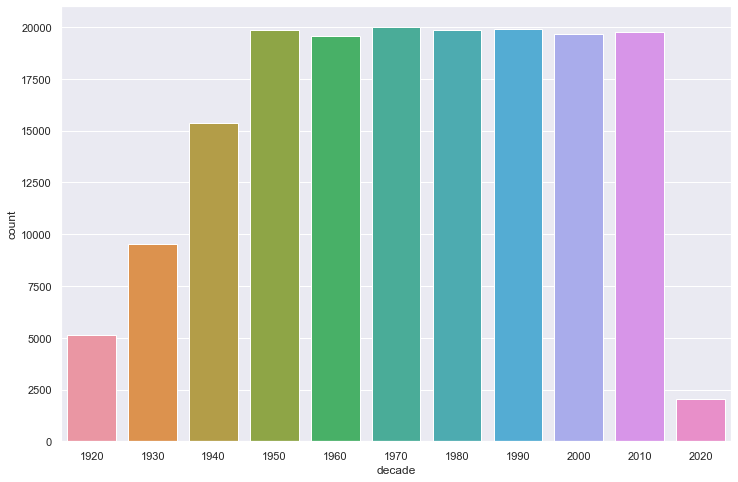

In [153]:
# Create a decade columm that calculates the decade of the year of the song
data['decade'] = data['year'].map(lambda x: int(x/10)* 10)
sns.set(rc={'figure.figsize':(12 ,8)})
b = sns.countplot(x=data['decade'])

Over time, the dataset displayed a steady increase in songs (+ ~50,000 songs) each decade from the 1920s-1950s. With technological advances like vinyl records, tapes, compact disks etc. we can observe the increased accessibility and popularity of the music industry. 

After the 1950s, the data stabilizes and contains ~20,000 songs for the following decades, except for 2020. There is no documentation on when this data was pulled, which could explain why the data for 2020 seems to be incomplete.

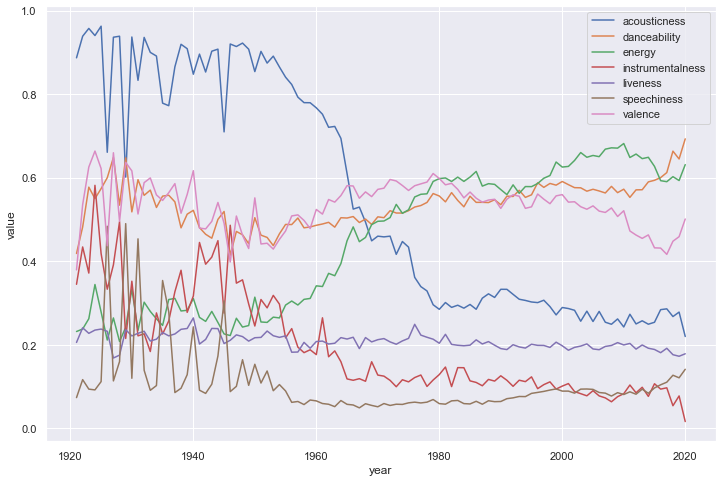

In [154]:
# Create dataset of song metrics
metrics = ['acousticness','danceability', 'energy','instrumentalness','liveness', 'speechiness', 'valence']
year_data = data_by_year[['year', 'acousticness','danceability', 'energy','instrumentalness','liveness', 'speechiness','valence']].copy()
year_data['year'] = pd.to_datetime(year_data['year'], format='%Y').dt.year

# Transform year data into a wide format and plot song metrics over time
sns.set(rc={'figure.figsize':(12 ,8)})
p = sns.lineplot(x='year', y='value', hue='variable', data=pd.melt(year_data, 'year'))
p.legend(loc='upper right')

Diving deeper into each decade of music, we can take a look at the differences in song metrics such as duration, danceability, loudness, etc. 
The plot above shows the shift in the type of music as the decades pass. In 1920s-1950s, songs had higher acousticness and less energy compared to the more recent songs of the 2000s which have an inverse relationship between the two metrics. Songs in the early 1900s often focused on acoustic and instrumental sounds like that of in Jazz or Blues music. Once we enter the 2000s, computers and technology has progressed and as a result we see more upbeat, high energy, and danceable songs become popular.

Text(0.5, 1.0, 'Song Duration')

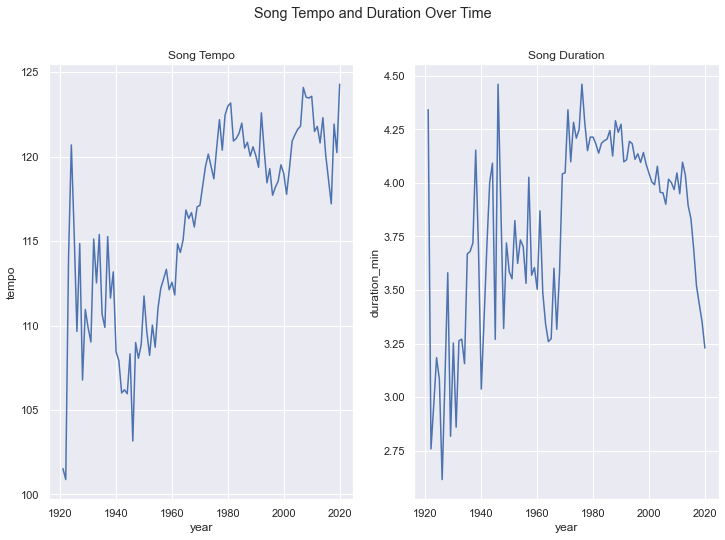

In [169]:
# Create dataset of tempo/duration metrics
metrics = ['tempo', 'duration_ms']
year_data = data_by_year[['year', 'tempo', 'duration_ms']].copy()
year_data['year'] = pd.to_datetime(year_data['year'], format='%Y').dt.year
year_data['duration_min'] = year_data['duration_ms'] / 60000

# Plot tempo and duration over time
fig, axes = plt.subplots(1, 2, figsize=(12,8))
fig.suptitle('Song Tempo and Duration Over Time')

# Tempo plot
sns.lineplot(x='year', y='tempo', data=year_data, ax=axes[0])
axes[0].set_title('Song Tempo')

# Duration plot
sns.lineplot(x='year', y='duration_min', data=year_data, ax=axes[1])
axes[1].set_title('Song Duration')

Similar to the other plots and trends, with the evolution of technology tempo has increased over time as songs being produced with more audio engineering. On the right plot, the duration of songs have fluctuated throughout the early 1900s, but in the 2000s has become more stable with a majority of songs ~4 minutes long. In the most recent years there has been a slight decline in song duration, which can be a result of trends in the music industry such as the rise of streaming platforms. Several factors around streaming payouts may be subtly affecting song lengths of music being released. 

### d. Genre Breakdown